In [10]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
img_path = "/content/drive/MyDrive/OpenCV/demo_edge.jpg"

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [13]:
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
img_np = np.array(img, dtype=np.float32)

In [14]:
def convolve(image, kernel):
  h, w = image.shape
  kh, kw = kernel.shape
  pad_h = kh // 2
  pad_w = kw // 2
  padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
  output = np.zeros_like(image)

  for i in range(h):
    for j in range(w):
      region = padded[i:i+kh, j:j+kw]
      output[i,j] = np.sum(region * kernel)
  return output

In [15]:
# prewitt
Gx = np.array([[-1,0,1],
               [-1,0,1],
               [-1,0,1]], dtype=np.float32)
Gy = np.array([[1,1,1],
               [0,0,0],
               [-1,-1,-1]],dtype=np.float32)

In [16]:
grad_x = convolve(img_np, Gx)
grad_y = convolve(img_np, Gy)
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_magnitude = np.clip(gradient_magnitude, 0, 255)

In [17]:
# laplace
laplace_kernel = np.array([[0,1,0],
                           [1,-4,1],
                           [0,1,0]], dtype=np.float32)
laplace_output = convolve(img_np, laplace_kernel)
laplace_output = np.clip(np.abs(laplace_output),0,255)

(np.float64(-0.5), np.float64(735.5), np.float64(735.5), np.float64(-0.5))

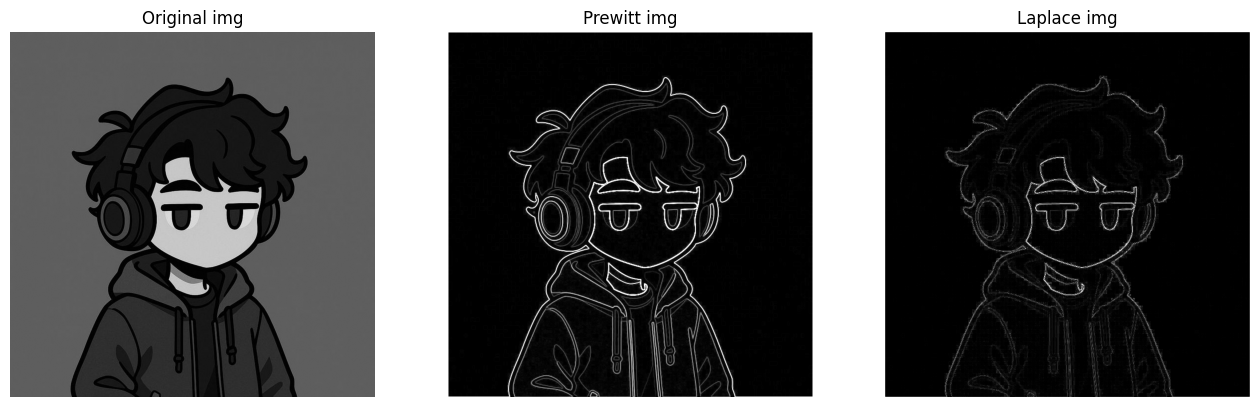

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(1,3,1)
plt.title("Original img")
plt.imshow(img_np, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Prewitt img")
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Laplace img")
plt.imshow(laplace_output, cmap='gray')
plt.axis('off')

In [19]:
# use opencv
laplacian = cv.Laplacian(img, cv.CV_64F)
sobel_x = cv.Sobel(img, cv.CV_64F,1,0, ksize=5)
sobel_y = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)

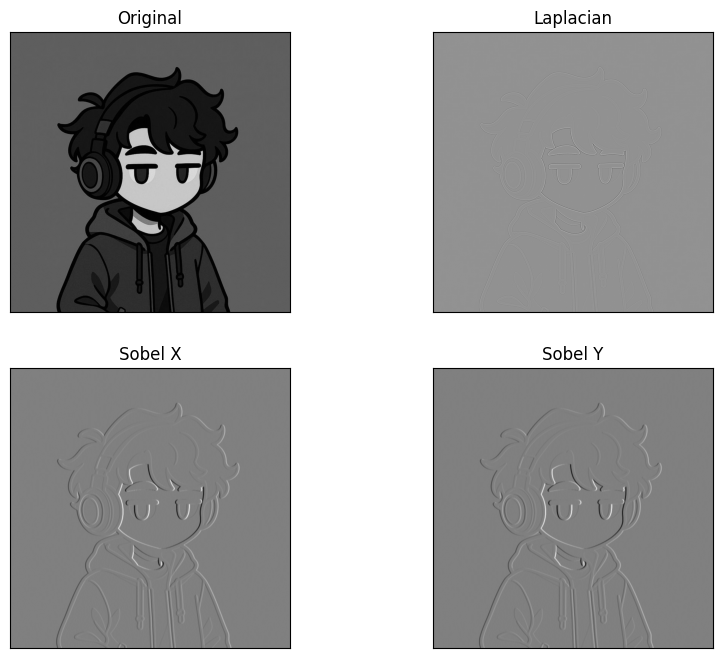

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobel_x,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobel_y,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()